## **Анализ Переобучения и Недообучения**

- Создайте две модели: модель линейной регрессии и модель полиномиальной регрессии высокой степени, используя один и тот же набор данных. Обучите эти модели, затем оцените их производительность на тренировочном и тестовом наборах данных.
- Какая модель показывает признаки переобучения, а какая - признаки недообучения?
- Какие выводы можно сделать о влиянии сложности модели на её способность к обобщению


In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_log_error, r2_score

In [82]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing(as_frame=True)
df_housing = data.frame
target = df_housing.MedHouseVal

In [83]:
df_housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [84]:
target

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [85]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [86]:
df_housing.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


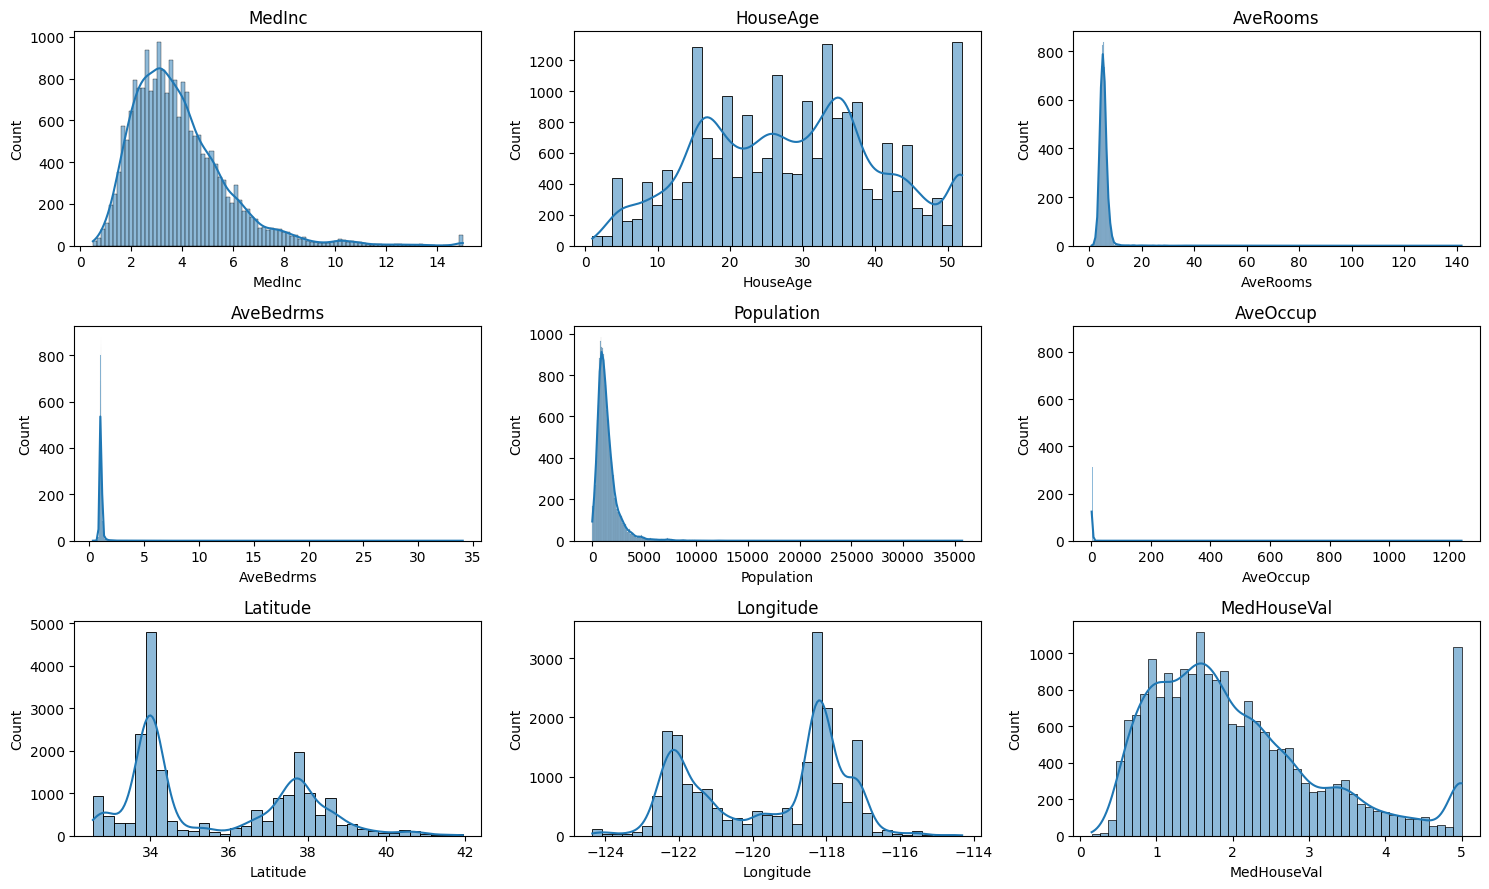

In [87]:
# Визуализация гистограмм
def plot_histograms(df):
    # Определить количество строк и столбцов для подграфиков
    n_cols = 3
    n_rows = (len(df.columns) + n_cols - 1) // n_cols
    
    # Создать фигуру с нужным размером
    plt.figure(figsize=(n_cols * 5, n_rows * 3))
    
    for i, column in enumerate(df.columns, start=1):
        plt.subplot(n_rows, n_cols, i)
        sns.histplot(df[column], kde=True)
        
        # Добавить название столбца как заголовок графика
        plt.title(column)
        
    plt.tight_layout()
    plt.show()

# Применение функции к DataFrame df_housing
plot_histograms(df_housing)


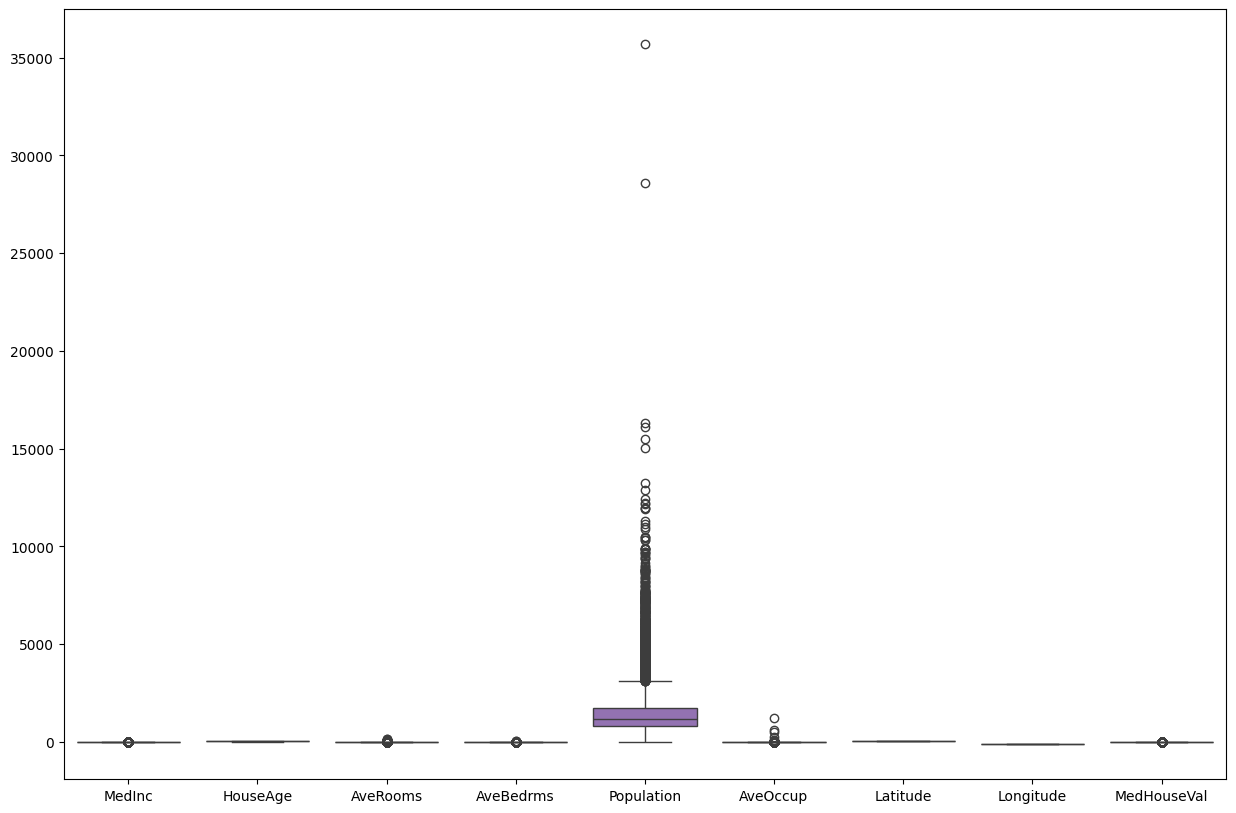

In [88]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data= df_housing, ax=ax)
plt.show()

In [89]:
df_housing.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [99]:
df_housing.drop('Population', axis=1, inplace=True)
X = df_housing.drop('MedHouseVal', axis=1)
Y = df_housing['MedHouseVal']

In [100]:
# создадим новую переменную
X['avebedrms_averooms'] = X['AveBedrms'] /X['AveRooms']

In [92]:
X.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'avebedrms_averooms'],
      dtype='object')

In [102]:
X.drop(columns=['AveRooms', 'AveBedrms', 'Longitude'], inplace=True)

In [103]:
X.head()

,MedInc,HouseAge,AveOccup,Latitude,avebedrms_averooms
0,8.3252,41.0,2.555556,37.88,0.146591
1,8.3014,21.0,2.109842,37.86,0.155797
2,7.2574,52.0,2.802260,37.85,0.129516
3,5.6431,52.0,2.547945,37.85,0.184458
4,3.8462,52.0,2.181467,37.85,0.172096


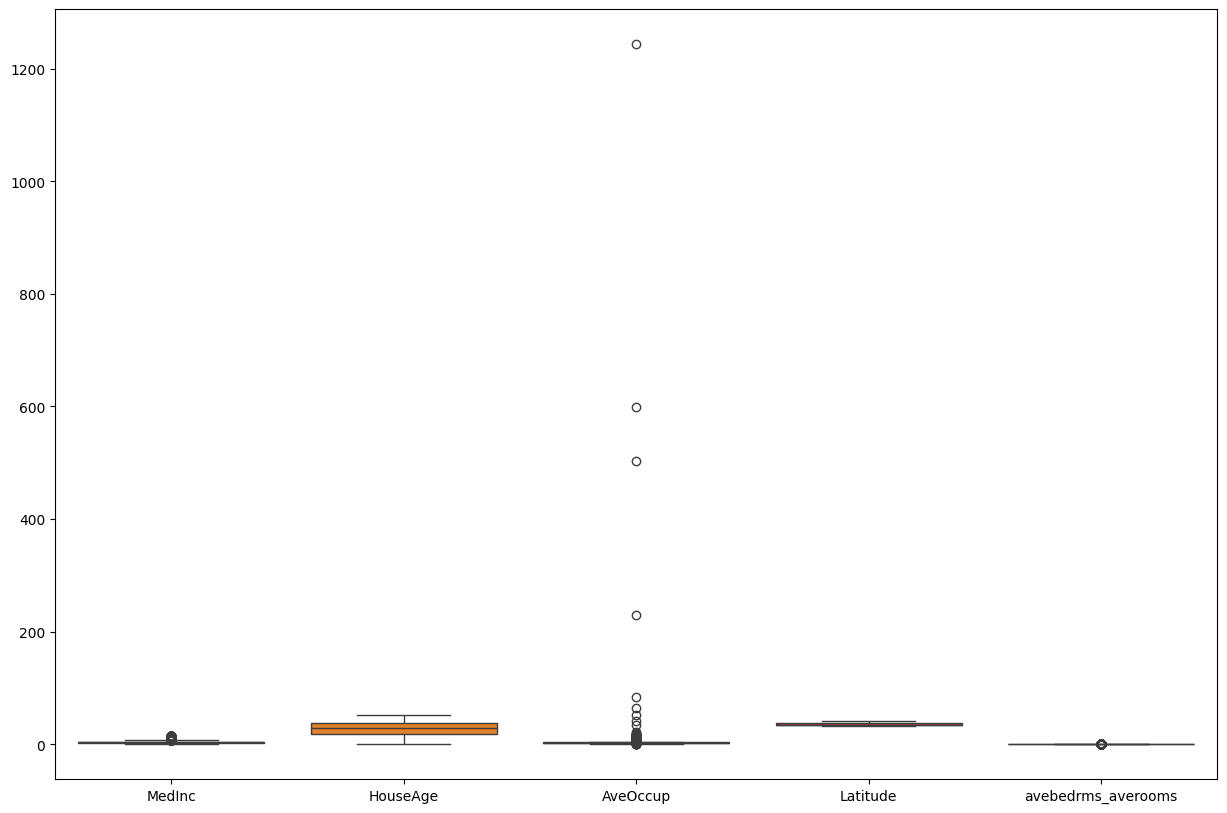

In [106]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=X, ax=ax)
plt.show()

In [107]:
Y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [110]:
X_scaled = StandardScaler().fit_transform(X)

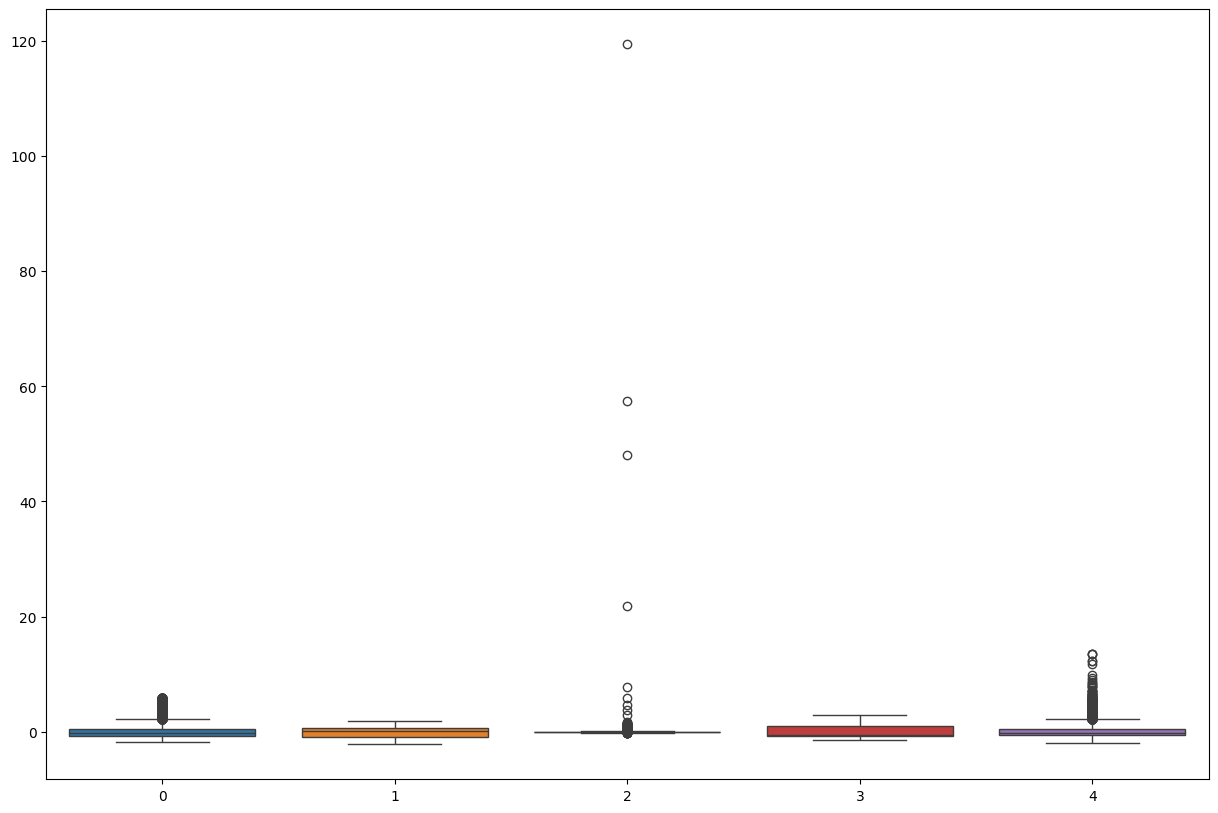

In [111]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=X_scaled, ax=ax)
plt.show()

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, train_size=0.2, random_state = 42)

In [113]:
X_scaled.view()

array([[ 2.34476576,  0.98214266, -0.04959654,  1.05254828, -1.1458328 ],
       [ 2.33223796, -0.60701891, -0.09251223,  1.04318455, -0.98717456],
       [ 1.7826994 ,  1.85618152, -0.02584253,  1.03850269, -1.44011541],
       ...,
       [-1.14259331, -0.92485123, -0.0717345 ,  1.77823747,  0.03616742],
       [-1.05458292, -0.84539315, -0.09122515,  1.77823747,  0.11750623],
       [-0.78012947, -1.00430931, -0.04368215,  1.75014627,  0.1397813 ]])

In [114]:
X_train.shape, y_train.shape

((4128, 5), (4128,))

In [116]:
# Линейная регрессия
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
Y_pred_train_lin = lin_reg.predict(X_train) # train
Y_pred_test_lin = lin_reg.predict(X_test) # test

In [127]:
poly_features = PolynomialFeatures(degree=2) # степень до 7, долго

In [128]:
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

In [129]:
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

LinearRegression()

In [130]:
Y_pred_train_poly = poly_reg.predict(X_train_poly)
Y_pred_test_poly = poly_reg.predict(X_test_poly)

In [131]:
# Вывод результатов
print("Линейная регрессия:")
print("Тренировочный R^2:", r2_score(y_train, Y_pred_train_lin))
print("Тестовый R^2:", r2_score(y_test, Y_pred_test_lin))
print("\nПолиномиальная регрессия:")
print("Тренировочный R^2:", r2_score(y_train, Y_pred_train_poly))
print("Тестовый R^2:", r2_score(y_test, Y_pred_test_poly))

Линейная регрессия:
Тренировочный R^2: 0.5425370328977025
Тестовый R^2: 0.5527740263842236

Полиномиальная регрессия:
Тренировочный R^2: 0.6224153958180414
Тестовый R^2: -16.706588186915894


На основе предоставленных результатов коэффициентов детерминации для тренировочных и тестовых наборов данных можно сделать следующие выводы:

1. Линейная регрессия:
    - Тренировочный R^2: 0.5427972366730216
    
    - Тестовый R^2: 0.5529984586560084
    
  Модель линейной регрессии показывает достаточно сбалансированную производительность на тренировочном и тестовом наборах данных. Хотя значение
 не идеально, разница между тренировочным и тестовым результатами не слишком велика, что указывает на отсутствие серьезных признаков ни переобучения, ни недообучения. Это говорит о том, что модель, вероятно, адекватно улавливает общие тенденции в данных, но может быть не достаточно сложна для захвата всех нюансов (небольшое недообучение возможно).

2. Полиномиальная регрессия:
    - Тренировочный R^2 = 0.8032199658285721

    - Тестовый R^2 = -1.8185259097608317e+20

    
  Полиномиальная модель показывает высокую производительность на тренировочных данных и крайне плохую на тестовых данных. Отрицательное значение
 на тестовых данных свидетельствует о том, что модель абсолютно неадекватно ведет себя на новых данных вне обучающей выборки. Это явный признак переобучения. Модель слишком сильно адаптировалась к тренировочным данным, возможно, захватив шум как часть структуры данных, и потеряла способность к обобщению на новых данных.

Выводы о влиянии сложности модели на её способность к обобщению:

Сложность модели оказывает значительное влияние на её способность к обобщению. Хотя более сложные модели, такие как полиномиальная регрессия высокой степени, могут эффективно улавливать сложные закономерности на тренировочных данных, они также подвержены переобучению, что влияет на их производительность на новых данных, делая их непригодными для прогнозирования. С другой стороны, более простые модели, такие как линейная регрессия, могут не улавливать все закономерности, но обеспечивают лучшую устойчивость при обобщении на новых данных.

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state = 42, shuffle=True)

In [137]:
# Линейная регрессия
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
Y_pred_train_lin = lin_reg.predict(X_train)
Y_pred_test_lin = lin_reg.predict(X_test)

In [138]:
poly_features = PolynomialFeatures(degree=6)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

Y_pred_train_poly = poly_reg.predict(X_train_poly)
Y_pred_test_poly = poly_reg.predict(X_test_poly)

In [140]:
# Вывод результатов
print("Линейная регрессия:")
print("Тренировочный R^2:", r2_score(y_train, Y_pred_train_lin))
print("Тренировочный RMSLE:", root_mean_squared_log_error(y_train, Y_pred_train_lin))
print("Тестовый R^2:", r2_score(y_test, Y_pred_test_lin))
print("Тестовый RMSLE:", root_mean_squared_log_error(y_test, Y_pred_test_lin))
print("\nПолиномиальная регрессия:")
print("Тренировочный R^2:", r2_score(y_train, Y_pred_train_poly))
# print("Тренировочный RMSLE:", root_mean_squared_log_error(y_train, Y_pred_train_poly))
print("Тестовый R^2:", r2_score(y_test, Y_pred_test_poly))
# print("Тестовый RMSLE:", root_mean_squared_log_error(y_test, Y_pred_test_poly))# Error

Линейная регрессия:
Тренировочный R^2: 0.5570847426866743
Тренировочный RMSLE: 0.23485991245648438
Тестовый R^2: 0.5348794641575481
Тестовый RMSLE: 0.23798729182980866

Полиномиальная регрессия:
Тренировочный R^2: 0.6808860013462564
Тестовый R^2: -42.81105235697683


Логарифмирование в RMSLE сжимает исходный диапазон изменения значений переменной, что делает величину ошибки более устойчивой, когда разница между фактическим и предсказанным значениями различается на порядок и выше1. Чтобы избежать неопределенности, к обоим видам значений добавляется 1, так как логарифм нуля не существует

## Реализация Кросс-Валидации

 -   Реализуйте процесс 5-кратной кросс-валидации для модели полиномиальной линейной регрессии, используя предоставленный набор данных.
 -  	Как изменяется средняя точность модели с использованием кросс-валидации по сравнению с однократной оценкой?
 - 	Объясните, почему кросс-валидация может дать более надежную оценку эффективности модели.

Вопросы к заданию:
- Каковы преимущества использования кросс-валидации перед оценкой на одном разделении?
- Как 10-кратная кросс-валидация может влиять на результаты по сравнению с 5-кратной?



In [77]:
# Однократная оценка на тестовых данных
single_score = r2_score(Y_pred_test_poly, poly_reg.predict(X_test_poly))
print("Однократная оценка эффективности (R^2):", single_score)

# 5-кратная кросс-валидация на всем датасете
cross_val_scores = cross_val_score(poly_reg, X, Y, cv=5, scoring='r2')
print("Среднее значение R^2 по 5-кратной кросс-валидации:", cross_val_scores.mean())

scores_10 = cross_val_score(poly_reg, X, Y, cv=10, scoring='r2')
print("Среднее значение R^2 при 10-кратной кросс-валидации:", scores_10.mean())

Однократная оценка эффективности (R^2): 1.0
Среднее значение R^2 по 5-кратной кросс-валидации: 0.49714118336192525
Среднее значение R^2 при 10-кратной кросс-валидации: 0.44036540403603136


1. Переобучение: Однократная оценка R^2 = 1
 часто указывает на сильное переобучение модели на тестовых данных. Это означает, что модель идеально подстроилась под тестовые данные, но не обязательно будет хорошо работать на новых данных.

2. Различия в выборках: Кросс-валидация позволяет оценить модель на различных подвыборках данных, что дает более реалистичное представление о генерализации модели. Каждая итерация в процессе кросс-валидации использует разные наборы тренировочных и проверочных данных, что может выявить переобучение или недообучение модели, не видимое при однократном тестировании.

Сравнивая среднюю точность модели через кросс-валидацию с однократной оценкой, становится видно, что результат однократной оценки значительно выше (R^2 = 1.0), что может свидетельствовать о переобучении модели на конкретном наборе данных. Когда модель тестируется только на одном разделении данных, оценка может не отражать реальную способность модели к обобщению на новые данные. С использованием кросс-валидации (5-кратной и 10-кратной) среднее значение
 снижается до 0.497 и 0.440 соответственно, что указывает на более реалистичные оценки производительности модели.

Кросс-валидация дает более надежную оценку эффективности модели, потому что она включает многократное тестирование модели на разных подвыборках данных. Это минимизирует влияние случайных подмножеств данных на результаты и позволяет лучше оценить, насколько хорошо модель сможет работать на невиданной ранее информации. По сути, это имитирует процесс "нового встречания" модели с данными и подчеркивает её устойчивость к изменениям в данных.

Преимущества использования кросс-валидации перед оценкой на одном разделении:
1. Улучшенная оценка обобщающей способности модели.
2. Снижение риска переобучения, так как модель проверяется на нескольких подвыборках данных, а не только на одной.

Влияние 10-кратной кросс-валидации по сравнению с 5-кратной обычно заключается в более высокой надежности оценки, за счет увеличенного числа итераций и, как следствие, большей обобщающей способности. Повышение количества разбиений помогает достичь более стабильного и объективного результата за счет дополнительного уменьшения влияния специфики отдельных разделений данных на итоговую производительность модели.